In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm
import warnings

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics

nastavení

In [17]:
graf_priprava_dat = False

df_path = fr"C:\Users\halik\OneDrive\Dokumenty\GitHub\predikce-nabidky\funcni data set - Copy.xlsx"#@ cesta k datasetu

#@ externi regresory arima modelu
external_regressor_columns = ["nove-1", "zbytek-1", "predictor"]
#@ promenne pouzite v modelu ktere potrebuji detrendovat, deseasonalizovat...
parametry = ['aktivni-1', *external_regressor_columns] 

#@ hyperparametry ARIMY 
p = 2  # AR myslim si ze by to melo byt 2 aby nebyl overfitting protoze pacf hodne spadne po lag=2
d = 1  # I 
q = 2  # MA


import dat

In [18]:

#@ args:
    # remove_first: odstrani prvních remove first řádků z datasetu (protože nejsou kompletni...)
    # remove_last: odstrani posledni remove_last řádků proto z data setu 
        # default = 6 (momentalne je poslednich 1 radku na predikce)
def get_df(remove_first = 0, remove_last = 1):
    df = pd.read_excel(df_path)
    df = df.drop(df.index[:remove_first])
    if remove_last != 0:
        df = df.drop(df.index[-remove_last:])
    #df['datetime'] = pd.date_range(start='2016-02-01', periods=len(df.index.values), freq='MS')
    return df
df = get_df(remove_first=12)

detrendování dat

In [19]:
#
#df = get_df(remove_first=12)
#
#columns = df.columns.tolist()
#columns.remove('datum')
#
#df_detrend = df.copy()
#for column in columns:
#    detrended = df[column] - df[column].rolling(window=2).mean()  #@window size nastudovat, upravit
#    df_detrend[column] = detrended
#
#df_detrend = df_detrend[1:]
#plt.plot(df.index, df['aktivni'], label='Original')
#plt.plot(df_detrend.index, df_detrend['aktivni'], label='Detrended')
#plt.legend()
#plt.show()

deseasonalizace dat

In [20]:
#df_deseasoned = df_detrend.copy()
#for column in columns:
#    decomp = sm.tsa.seasonal_decompose(df_detrend[parametr], period=12, model='additive')
#    df_deseasoned[parametr] = df_detrend[parametr] - decomp.seasonal.values
#    
#plt.plot(df_detrend.index, df_detrend['aktivni'])
#plt.plot(df_deseasoned.index, df_deseasoned['aktivni'])

<function matplotlib.pyplot.show(close=None, block=None)>

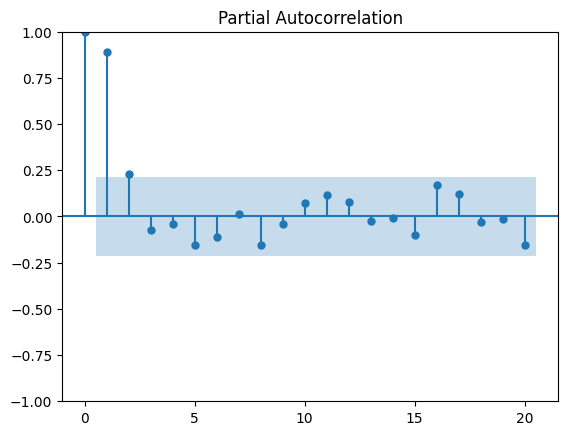

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(df['aktivni'])
plt.show

arima modely

In [35]:
#! SMAZAT NA DEBUGING
import warnings
warnings.filterwarnings("ignore")

#df_arima = df_deseasoned
df_arima = df

target = df_arima['aktivni']
external_regressor_list = ['predictor']
external_regressor = df_arima[[*external_regressor_list]]

#display(df_arima)
p_list = [2,3,4]
d_list = [0,1,2,5]
q_list = [0,1,2,5]
for p in tqdm(p_list):
    best_score = 100000000000000000000
    for d in d_list:
        for q in q_list:
            if not p+q > len(target)/10:
                model = ARIMA(target, order=(p, d, q), exog= external_regressor)
                model_fit = model.fit()
                aic = model_fit.aic
                aicc = model_fit.aicc
                bic = model_fit.bic
                score = aic+aicc+bic
            if score < best_score:
                best_score = score
                best_model = model_fit
#print(f"AIC: {aic}")
print(f"AICC: {aicc}")
#print(f"BIC: {bic}")
print(best_model.summary())

100%|██████████| 3/3 [00:07<00:00,  2.51s/it]

AICC: 1323.086259908477
                               SARIMAX Results                                
Dep. Variable:                aktivni   No. Observations:                   86
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -648.218
Date:                Sat, 21 Oct 2023   AIC                           1308.435
Time:                        18:22:07   BIC                           1323.091
Sample:                             0   HQIC                          1314.330
                                 - 86                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
predictor      0.1670      0.161      1.040      0.298      -0.148       0.482
ar.L1         -0.3834      0.164     -2.341      0.019      -0.704      -0.062
ar.L2          0.0268      0

In [43]:
ps = [1,2,3,4]
ds = [0,1,2,3,4,5]
qs = [0,1,2,3,4,5]
for p in tqdm(ps):
    for d in ds:
        for q in qs:
            model = ARIMA(df['aktivni'], order=(p,d,q), exog=df['predictor']).fit()
            print(model.summary())

  0%|          | 0/4 [00:00<?, ?it/s]

                               SARIMAX Results                                
Dep. Variable:                aktivni   No. Observations:                   86
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -661.455
Date:                Sat, 21 Oct 2023   AIC                           1330.909
Time:                        18:27:26   BIC                           1340.727
Sample:                             0   HQIC                          1334.860
                                 - 86                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4692.5717   3371.544      1.392      0.164   -1915.534    1.13e+04
predictor     -0.1034      0.087     -1.185      0.236      -0.275       0.068
ar.L1          0.9887      0.021     47.486      0.0

 25%|██▌       | 1/4 [00:05<00:16,  5.63s/it]

                               SARIMAX Results                                
Dep. Variable:                aktivni   No. Observations:                   86
Model:                 ARIMA(1, 5, 5)   Log Likelihood                -647.749
Date:                Sat, 21 Oct 2023   AIC                           1311.497
Time:                        18:27:31   BIC                           1330.653
Sample:                             0   HQIC                          1319.183
                                 - 86                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
predictor     -0.0954      0.127     -0.753      0.452      -0.344       0.153
ar.L1         -1.0000      0.062    -16.129      0.000      -1.122      -0.878
ma.L1         -2.9530      0.121    -24.502      0.0

 25%|██▌       | 1/4 [00:11<00:35, 11.78s/it]


LinAlgError: LU decomposition error.


MAE: 629.6035637807701
MSE: 625129.3267458534
RMSE: 790.6512042271569



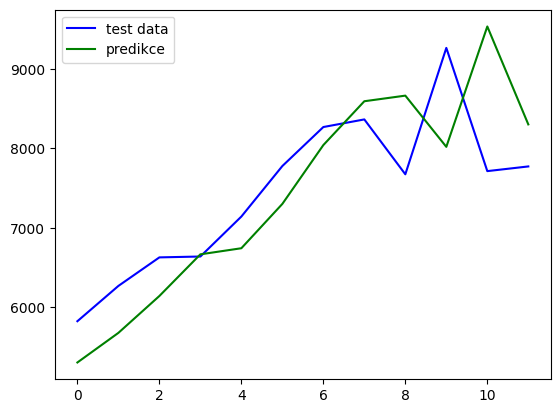

                               SARIMAX Results                                
Dep. Variable:                aktivni   No. Observations:                   85
Model:                 ARIMA(1, 3, 2)   Log Likelihood                -638.141
Date:                Sat, 21 Oct 2023   AIC                           1286.283
Time:                        19:08:00   BIC                           1298.317
Sample:                             0   HQIC                          1291.114
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
predictor      0.2505      0.141      1.773      0.076      -0.026       0.527
ar.L1         -0.4264      0.129     -3.303      0.001      -0.679      -0.173
ma.L1         -1.9930      0.140    -14.262      0.0

In [44]:
pred_list = []
df_test = df_arima[-12:]

p = 1
d = 3
q = 2

for i in range(len(df_test)):
    df_train = df_arima[:-12+i]
    df_test_pred = df_arima.iloc[-12+i]
    model = ARIMA(df_train['aktivni'], order=(p, d, q), exog=df_train['predictor'])
    model_fit = model.fit()
    pred = model_fit.forecast(steps=1, exog=[df_test_pred['predictor']])
    pred_list.append(pred)


mae = mean_absolute_error(df_test['aktivni'], pred_list)
mse = mean_squared_error(df_test['aktivni'], pred_list, squared=True)
rmse = mean_squared_error(df_test['aktivni'], pred_list, squared=False)

print(f"""
MAE: {mae}
MSE: {mse}
RMSE: {rmse}
""")



plt.plot(range(len(df_test)), df_test['aktivni'], color="blue", label="test data")
plt.plot(range(len(pred_list)), pred_list, color='green', label='predikce')
plt.legend()
plt.show()

print(model_fit.summary())

In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


forecast_mean_list = []
confidence_intervals_lower = []
confidence_intervals_upper = []

for i in range(len(df_test)):
    df_train = df_arima[:-12+i]
    df_test_pred = df_arima.iloc[-12+i]
    
    model = sm.tsa.ARIMA(df_train['aktivni'], order=(p, d, q), exog=df_train[['zbytek-1', "predictor"]])
    model_fit = model.fit()
    
    forecast = model_fit.get_forecast(steps=1, exog=[df_test_pred['zbytek-1']])
    print(model_fit.summary())
    #@ alpha = 0.05 je confidence interval 95% atd.
    conf_int = forecast.conf_int(alpha=0.05)
    #* listy s vsema predikcema
    forecast_mean = forecast.predicted_mean
    forecast_mean_list.append(forecast_mean)
    confidence_intervals_lower.append(conf_int['lower aktivni'])
    confidence_intervals_upper.append(conf_int['upper aktivni'])


plt.plot(range(len(df_test)), df_test['aktivni'], color="blue", label="test data")
plt.plot(range(len(df_test)), confidence_intervals_lower, color="orange", label=r"95% conf int")
plt.plot(range(len(df_test)), confidence_intervals_upper, color="orange")
plt.plot(range(len(df_test)), forecast_mean_list, color="green", label='forecast mean')
plt.legend()
plt.show()

ValueError: Provided exogenous values are not of the appropriate shape. Required (1, 2), got (1,).

predikce na dalsi mesic (202304) je 7976 bytu v nabidce, s 95% pravdepodobnosti bode hodnota v intervalu 7003 : 8949 to znamena predpoklanou zmenu x % oproti predchozimu mesici.


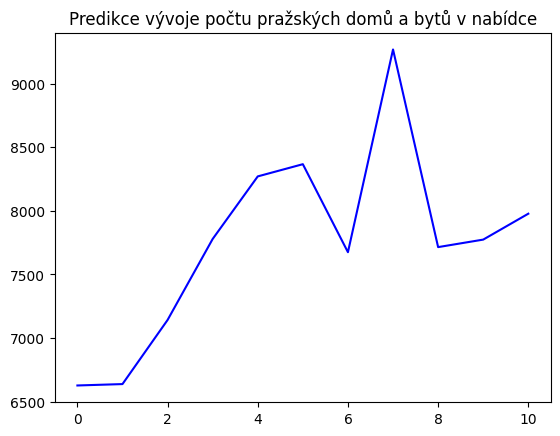

In [ ]:
df_new = get_df(remove_first=12,remove_last = 0) # 0 protze nechci odebrat radky co predpovidam
df_new = df_new.drop(df_new.index[0:-1])
df_graf = get_df(remove_first=12, remove_last=0) # df pro kresleni grafu (bude v nem x hodnot za poslednich x mesicu ktery chci nakreslit do grafun + plust forecast mean kterej jsem predpovedel)
df_graf = df_graf[-11:]


#@ nastaveni confidence intervalu pro precdikci v %
confidence = 95

forecast = model_fit.get_forecast(steps=1, exog=df_new['zbytek-1'])
conf_int = forecast.conf_int(alpha=1-(confidence/100))
conf_int_lower = conf_int['lower aktivni']
conf_int_upper = conf_int['upper aktivni']
forecast_mean = forecast.predicted_mean

df_graf['aktivni'].iloc[-1] = forecast_mean

print(f"predikce na dalsi mesic ({int(df_new['datum'])}) je {int(forecast_mean)} bytu v nabidce, s {confidence}% pravdepodobnosti bode hodnota v intervalu {int(conf_int_lower)} : {int(conf_int_upper)} to znamena predpoklanou zmenu x % oproti predchozimu mesici.")

#>> graf
plt.title("Predikce vývoje počtu pražských domů a bytů v nabídce")
plt.plot(range(len(df_graf)), df_graf['aktivni'], color="blue")

plt.show()


    rolling window forecast

distribuce

In [ ]:
from email.message import EmailMessage
import ssl
import smtplib
import os
import json
#@params

#* Load credentials from config.json
with open('config.json') as config_file:
    config_data = json.load(config_file)

email_user = config_data['email_user']
email_password = config_data['email_password']
email_recievers = config_data['email_recievers']

subject = "predikce nabidky"
email_body = f"""
predikce na dalsi mesic ({str(int(df_new['datum']))[4:]},{str(int(df_new['datum']))[:4]}) je {str(int(df_pred))} bytu v nabidce
"""

def send_mail(email_body):
    odeslat = False
    if odeslat:
        try:
            server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
            server.ehlo()
            server.login(email_user, email_password)
            server.sendmail(email_user, email_recievers, email_text)
            server.close()
            print('Email odeslán! SIIIUUUU')
        except Exception as exception:
            print("Error: %s!\n\n" % exception)
    else:
        print(email_body)
send_mail(email_body)

FileNotFoundError: [Errno 2] No such file or directory: 'config.json'